Firt importing libraries which are used for reading,cleaning and visualizing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing online_sales file
online_sales = pd.read_csv("Online_Sales.csv")

In [3]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [4]:
online_sales.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [5]:
online_sales.duplicated().sum()

0

No null values and no duplicate data in online_sales df

In [6]:
# Converting transactions date from object to datetime datatype
def to_date(x):
    x1 = str(x)
    new_x = x1[:4]+"/"+x1[4:6]+"/"+x1[-2:]
    return new_x

In [7]:
online_sales['Transaction_Date'] = online_sales['Transaction_Date'].apply(to_date)

In [8]:
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'],format='%Y-%m-%d')

In [9]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [10]:
# Getting month from the date
online_sales['Month'] =  online_sales['Transaction_Date'].apply(lambda x: x.strftime('%b'))

In [11]:
# Importing customer demographic file
cust_data = pd.read_excel("CustomersData.xlsx")

In [12]:
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [13]:
cust_data.isnull().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [14]:
cust_data.duplicated().sum()

0

No null values and no duplicates in customer data file

In [15]:
dis_coupon = pd.read_csv("Discount_Coupon.csv")

In [16]:
dis_coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [17]:
dis_coupon.isnull().sum()

Month                0
Product_Category     0
Coupon_Code          0
Discount_pct         0
dtype: int64

In [18]:
dis_coupon.duplicated().sum()

0

In [19]:
dis_coupon.rename(columns={'Product_Category ': 'Product_Category'},inplace=True)

No null and duplicates in discount coupon file

In [20]:
market_spend = pd.read_csv("Marketing_Spend.csv")

In [21]:
market_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [22]:
market_spend['Market_Spend'] = market_spend['Offline_Spend'] + market_spend['Online_Spend']

In [23]:
market_spend.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
Market_Spend     0
dtype: int64

In [24]:
market_spend.duplicated().sum()

0

No Null values and duplicates in marketing spend files

In [25]:
market_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
 3   Market_Spend   365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.5+ KB


In [26]:
market_spend['Date'] =  pd.to_datetime(market_spend['Date'])

In [27]:
market_spend['Month'] = market_spend['Date'].dt.month

In [28]:
market_spend_df = market_spend.groupby('Month')['Market_Spend'].sum()

In [29]:
tax_amt = pd.read_excel("Tax_amount.xlsx")

In [30]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [31]:
tax_amt.isnull().sum()

Product_Category    0
GST                 0
dtype: int64

In [32]:
tax_amt.duplicated().sum()

0

No Null values and duplicates in tax amount data file

Combining all data files into one dataframe

In [33]:
df1 = pd.merge(online_sales,cust_data,how='inner',on='CustomerID')

In [34]:
df2 = pd.merge(df1,dis_coupon,how='inner',on=['Product_Category','Month'])

In [35]:
df3 = pd.merge(df2,market_spend,how='inner',left_on='Transaction_Date',right_on='Date')

In [36]:
df = pd.merge(df3,tax_amt,how='inner',on='Product_Category')

In [37]:
df.drop('Date',axis=1,inplace=True)

In [38]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,Offline_Spend,Online_Spend,Market_Spend,Month_y,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,10,4500,2424.5,6924.5,1,0.1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,ELEC10,10,4500,2424.5,6924.5,1,0.1
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,...,M,Chicago,12,ELEC10,10,4500,2424.5,6924.5,1,0.1
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,...,M,Chicago,12,ELEC10,10,4500,2424.5,6924.5,1,0.1
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,M,Chicago,12,ELEC10,10,4500,2424.5,6924.5,1,0.1


1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level


In [39]:
df['Invoice_Value'] = ((df['Quantity']*df['Avg_Price'])*(1-(df['Discount_pct']/100))*(1+df['GST'])) + df['Delivery_Charges']

### Exploratory Data analysis

- Understanding how many customers acquired every month


In [40]:
df['Month_numerical'] = df['Transaction_Date'].dt.month

Text(0.5, 1.0, 'Customers acquired every month')

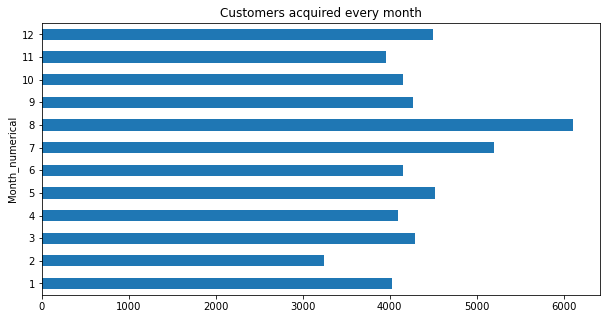

In [41]:
plt.figure(figsize=(10,5))
df.groupby('Month_numerical')['CustomerID'].count().plot(kind='barh')
plt.title('Customers acquired every month')

- Understand the retention of customers on month on month basis


In [42]:
monthly_transactions = pd.crosstab(index=df['CustomerID'],
           columns=df['Month_numerical'])
monthly_transactions

Month_numerical,1,2,3,4,5,6,7,8,9,10,11,12
CustomerID,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,2,0,0,0
12347,0,0,30,0,0,0,0,0,0,0,29,0
12348,0,0,0,0,0,17,0,0,0,6,0,0
12350,0,0,0,0,0,0,0,0,0,0,0,17
12356,0,0,0,0,0,0,0,0,36,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0,0,0,6,0,0,0,0,0,0,0,0
18260,0,0,0,0,0,11,0,25,0,3,0,0
18269,0,0,0,7,0,1,0,0,0,0,0,0


- How the revenues from existing/new customers on month on month basis

In [43]:
total_transactions = monthly_transactions.sum(axis=1).to_frame().rename(columns={0:"Total Transactions"})

In [44]:
new_cust = total_transactions[total_transactions['Total Transactions']==1]

In [45]:
new_cust.shape[0]

66

There are 66 new customer in the dataset

In [46]:
new_cust_df = df.loc[df['CustomerID'].isin(new_cust.index.values)]

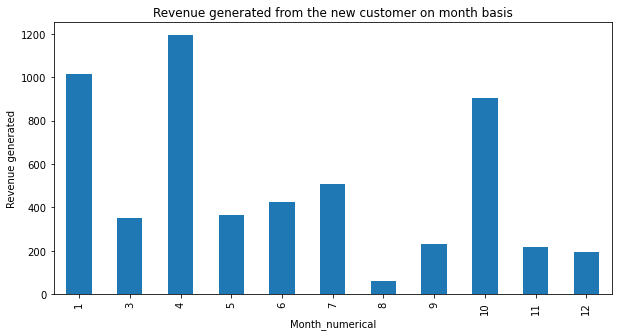

In [47]:
# Revenue generated by new customers on month and month basis
plt.figure(figsize=(10,5))
new_cust_df.groupby('Month_numerical')['Invoice_Value'].sum().plot(kind='bar')
plt.title('Revenue generated from the new customer on month basis')
plt.ylabel('Revenue generated')
plt.show()

In [48]:
existing_cust = total_transactions[total_transactions['Total Transactions']>1]

In [49]:
existing_cust.shape[0]

1402

There are 1402 existing customer in the dataset

In [50]:
existing_cust_df = df.loc[df['CustomerID'].isin(existing_cust.index.values)]

Text(0, 0.5, 'Revenue generated')

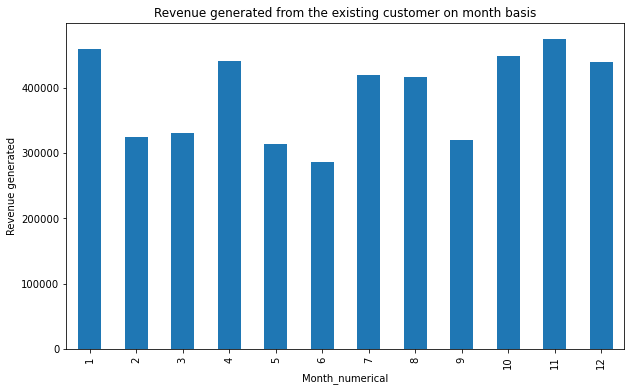

In [51]:
plt.figure(figsize=(10,6))
existing_cust_df.groupby('Month_numerical')['Invoice_Value'].sum().plot(kind='bar')
plt.title('Revenue generated from the existing customer on month basis')
plt.ylabel('Revenue generated')

-  How the discounts playing role in the revenues?


Text(0.5, 1.0, 'Revenue generated on basis of discount coupon status')

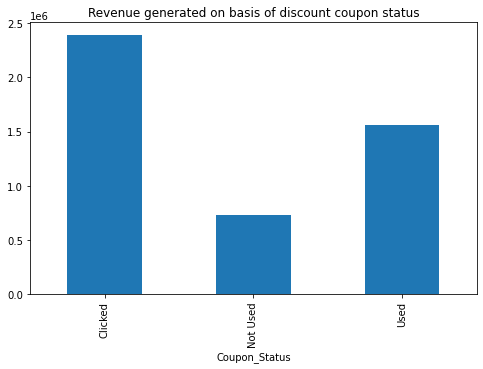

In [52]:
# when discount coupon is used
plt.figure(figsize=(8,5))
df.groupby('Coupon_Status')['Invoice_Value'].sum().plot(kind='bar')
plt.title("Revenue generated on basis of discount coupon status")

More revenue is generated when discount coupon is used in comparison of when not used

Text(0.5, 1.0, 'Revenue generated on different discount percent offered')

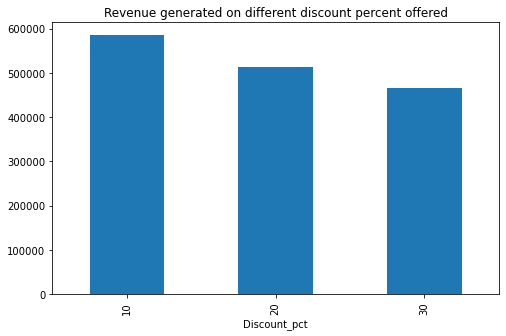

In [53]:
plt.figure(figsize=(8,5))
df[df['Coupon_Status']=='Used'].groupby('Discount_pct')['Invoice_Value'].sum().plot(kind='bar')
plt.title('Revenue generated on different discount percent offered')

Text(0.5, 1.0, 'Revenus generated on diffrent discount on different product category')

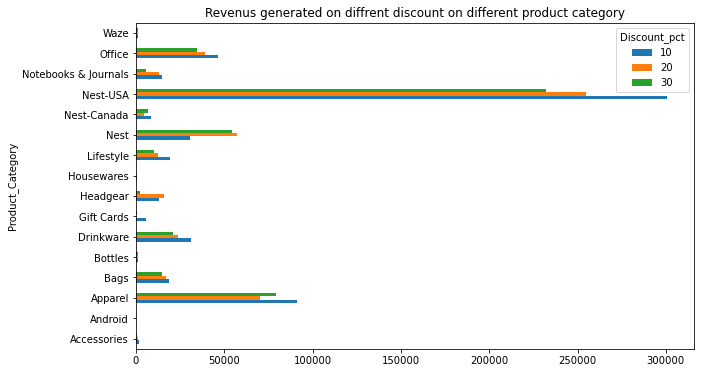

In [54]:
df_dis = df[df['Coupon_Status']=='Used']


pd.crosstab(index=df_dis['Product_Category'],
           columns=df_dis['Discount_pct'],
           values=df_dis['Invoice_Value'],
           aggfunc='sum').plot(kind='barh',figsize=(10,6))
plt.title("Revenus generated on diffrent discount on different product category")

#### KPI's Analysis

<AxesSubplot:ylabel='Product_Category'>

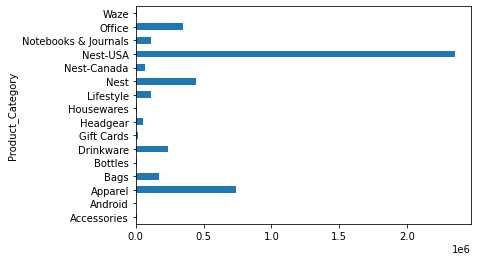

In [55]:
# Revenue by category
df.groupby('Product_Category')['Invoice_Value'].sum().plot(kind='barh')

<AxesSubplot:ylabel='Product_Category'>

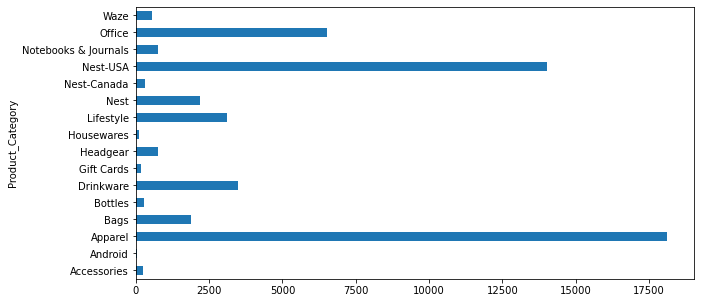

In [56]:
# Number of orders for each Product Category
df.groupby('Product_Category')['Transaction_ID'].count().plot(kind='barh',figsize=(10,5))

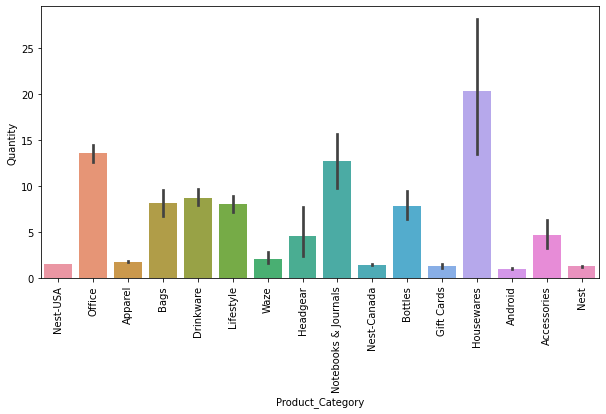

In [57]:
# Number of quantities order for each Product Category
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Product_Category',y='Quantity')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Product Category which are bought by new customers')

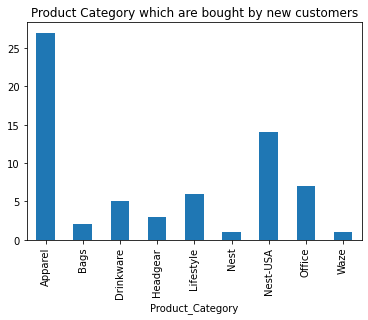

In [58]:
# Which Product Categories are preferes by new customers
new_cust_df.groupby('Product_Category')['CustomerID'].count().plot(kind='bar')
plt.title("Product Category which are bought by new customers")

Text(0.5, 1.0, 'Product Category which are bought by existing customers')

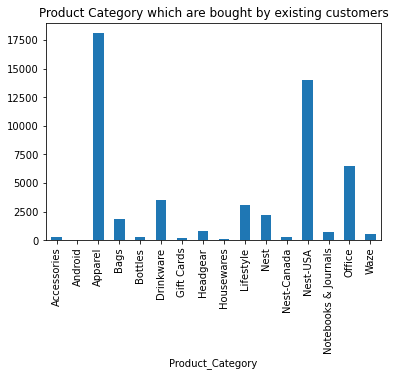

In [59]:
# Which Product Categories are preferes by existing customers
existing_cust_df.groupby('Product_Category')['CustomerID'].count().plot(kind='bar')
plt.title("Product Category which are bought by existing customers")

Text(0.5, 1.0, 'Revenue generated on every month')

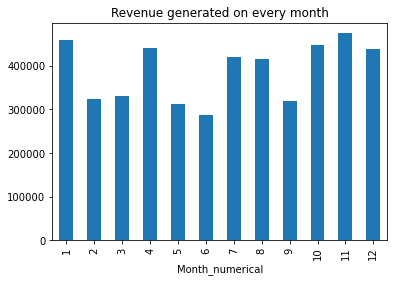

In [60]:
# Revenue generated on every month
df.groupby('Month_numerical')['Invoice_Value'].sum().plot(kind='bar')
plt.title("Revenue generated on every month")

Text(0.5, 1.0, 'Number of transactions on every month')

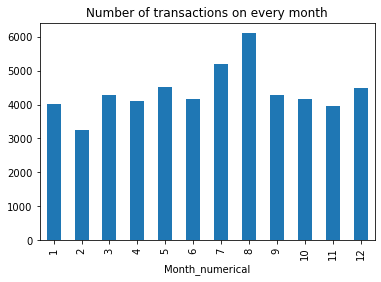

In [61]:
# Number of transactions on every month
df.groupby('Month_numerical')['Transaction_ID'].count().plot(kind='bar')
plt.title("Number of transactions on every month")

Text(0.5, 1.0, 'Number of Quantities ordered on every month')

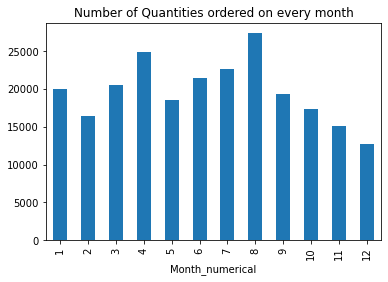

In [62]:
# Number of Quantities ordered on every month
df.groupby('Month_numerical')['Quantity'].sum().plot(kind='bar')
plt.title("Number of Quantities ordered on every month")

Text(0.5, 1.0, 'new Customers added over the months')

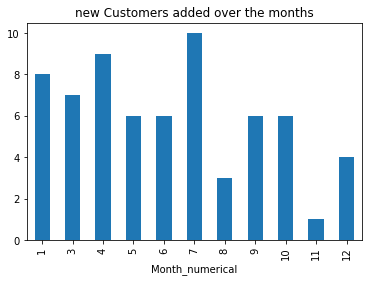

In [63]:
# New customer added on every month
new_cust_df.groupby('Month_numerical')['CustomerID'].count().plot(kind='bar')
plt.title('new Customers added over the months')

In [64]:
df['Day'] = df['Transaction_Date'].dt.day

Text(0.5, 1.0, 'Revenue generated over the days')

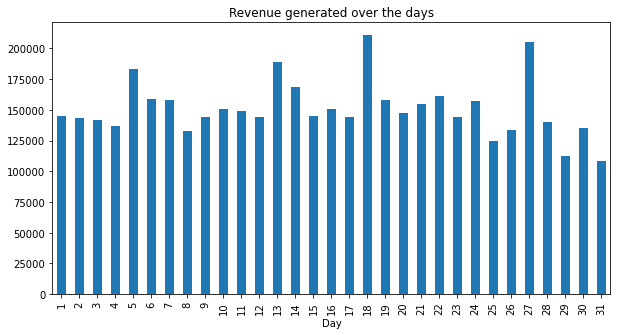

In [65]:
# Revenue generated over the days
df.groupby('Day')['Invoice_Value'].sum().plot(kind='bar',figsize=(10,5))
plt.title("Revenue generated over the days")

Text(0.5, 1.0, 'Total transactions over the days')

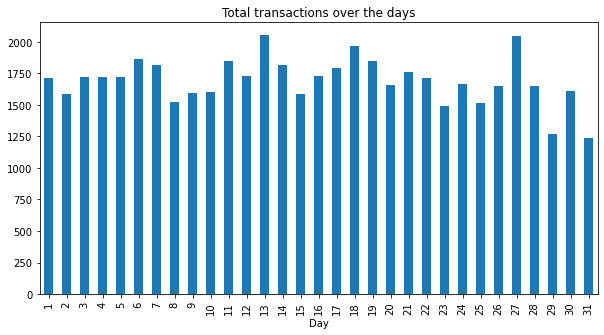

In [66]:
# Total transactions over the days
df.groupby('Day')['Transaction_ID'].count().plot(kind='bar',figsize=(10,5))
plt.title("Total transactions over the days")

Text(0.5, 1.0, 'Total Quantities ordered over the Days')

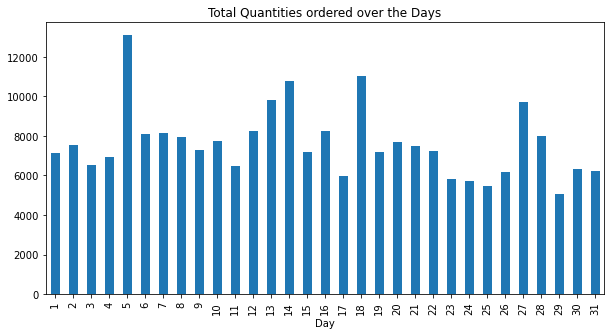

In [67]:
# Total Quantities ordered over the Days
df.groupby('Day')['Quantity'].sum().plot(kind='bar',figsize=(10,5))
plt.title("Total Quantities ordered over the Days")

In [68]:
# New customers added over the days
new_cust_df['Day'] = new_cust_df['Transaction_Date'].dt.day

Text(0.5, 1.0, 'New customers added over the days')

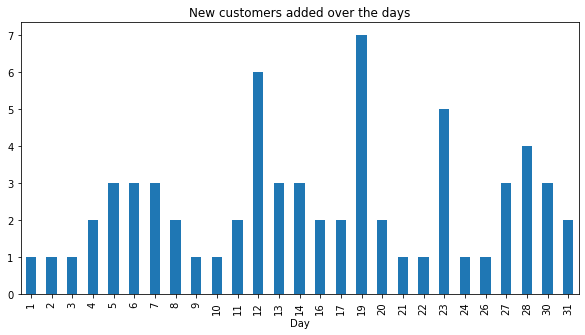

In [69]:
new_cust_df.groupby("Day")['CustomerID'].count().plot(kind='bar',figsize=(10,5))
plt.title("New customers added over the days")

In [70]:
df['Week'] = df['Transaction_Date'].dt.week

Text(0.5, 1.0, 'Revenue generated over the weeks')

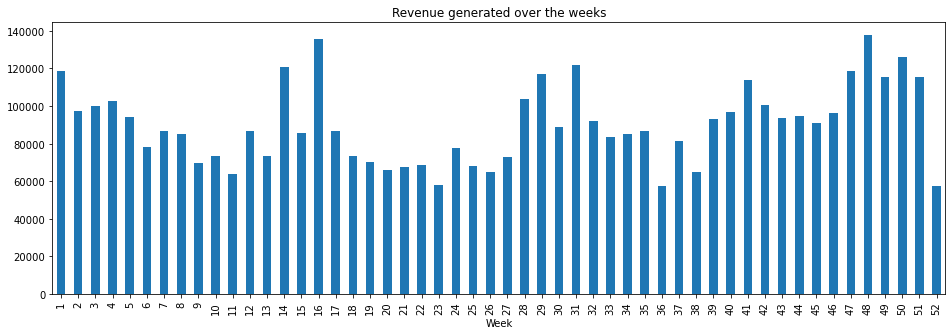

In [71]:
# Revenue generated over the weeks
df.groupby('Week')['Invoice_Value'].sum().plot(kind='bar',figsize=(16,5))
plt.title("Revenue generated over the weeks")

Text(0.5, 1.0, 'Total Transactions over the weeks')

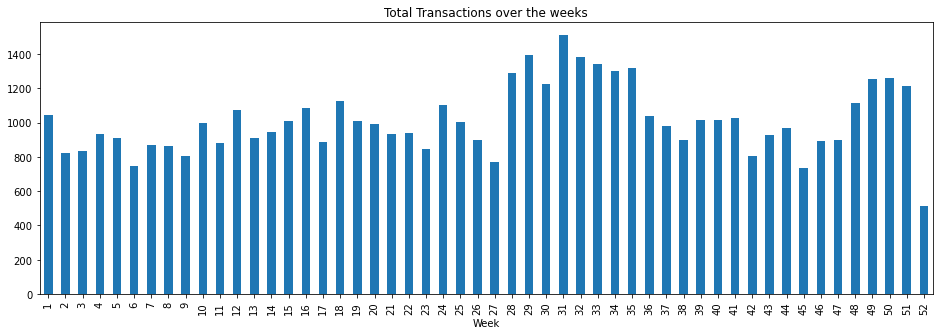

In [72]:
# Total Transactions over the weeks
df.groupby('Week')['Transaction_ID'].count().plot(kind='bar',figsize=(16,5))
plt.title("Total Transactions over the weeks")

Text(0.5, 1.0, 'Total quantities ordered over the weeks')

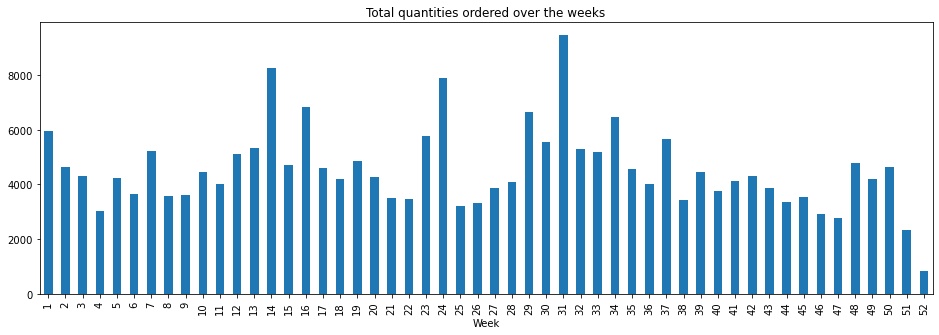

In [73]:
# total quantities ordered over the weeks
df.groupby('Week')['Quantity'].sum().plot(kind='bar',figsize=(16,5))
plt.title("Total quantities ordered over the weeks")

In [74]:
# New customers added over the weeks
new_cust_df['Week'] = new_cust_df['Transaction_Date'].dt.week

Text(0.5, 1.0, 'New customers added over the weeks')

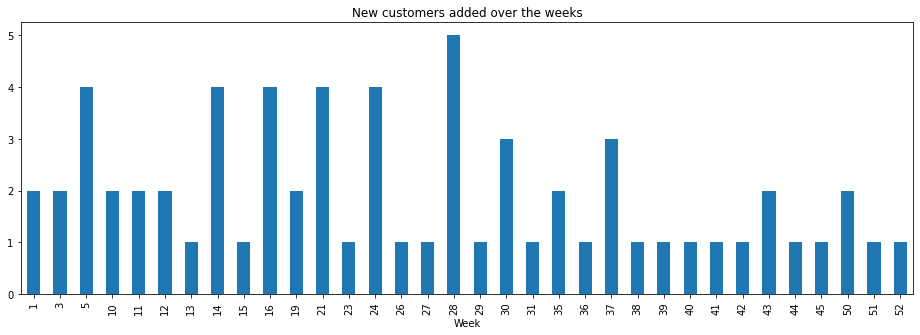

In [75]:
new_cust_df.groupby('Week')['CustomerID'].count().plot(kind='bar',figsize=(16,5))
plt.title("New customers added over the weeks")

Text(0.5, 1.0, 'Revenue generated at different locations')

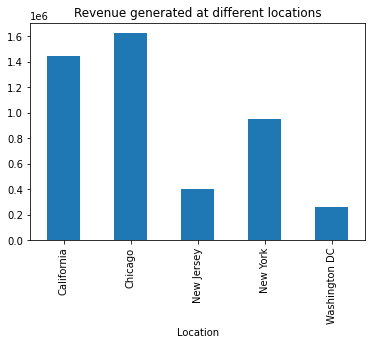

In [76]:
# Revenue generated at different locations
df.groupby('Location')['Invoice_Value'].sum().plot(kind='bar')
plt.title("Revenue generated at different locations")

Text(0.5, 1.0, 'Total transactions at different Locations')

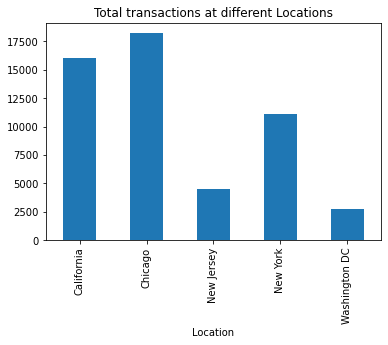

In [77]:
# Total transactions at different Locations
df.groupby('Location')['Transaction_ID'].count().plot(kind='bar')
plt.title("Total transactions at different Locations")

Text(0.5, 1.0, 'Total quantities ordered at diffrent Locations')

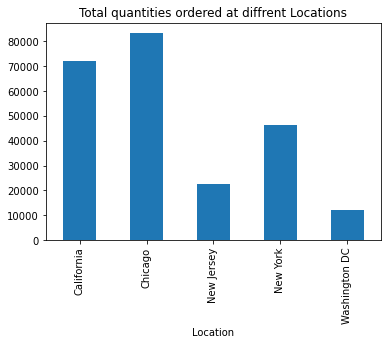

In [78]:
# Total quantities ordered at diffrent Locations
df.groupby('Location')['Quantity'].sum().plot(kind='bar')
plt.title("Total quantities ordered at diffrent Locations")

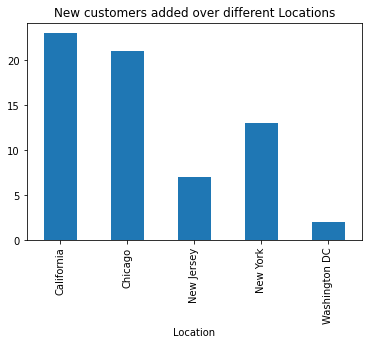

In [79]:
# New customers added over different Locations
new_cust_df.groupby('Location')['CustomerID'].count().plot(kind='bar')
plt.title("New customers added over different Locations")
plt.show()

#### Calculating Average Order Value

In [80]:
a = df.groupby('CustomerID')['Invoice_Value'].sum()
b = df.groupby('CustomerID')['Transaction_ID'].count()
avg_order_val_df = pd.merge(a,b,how='inner',on='CustomerID')

In [81]:
avg_order_val_df['Avg_order_value'] = avg_order_val_df['Invoice_Value']/avg_order_val_df['Transaction_ID']

In [82]:
avg_order_val_df.rename(columns={'Transaction_ID':'Transaction_counts'},inplace=True)

Text(0.5, 1.0, 'Top 10 customers with highest average order value')

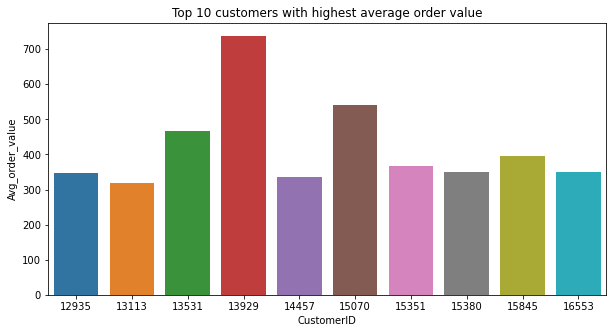

In [83]:
# Top 10 customer with highest average order value
top_avg_val = avg_order_val_df.sort_values(by='Avg_order_value',ascending=False)[:10]

plt.figure(figsize=(10,5))
sns.barplot(x = top_avg_val.index,y=top_avg_val['Avg_order_value'])
plt.title('Top 10 customers with highest average order value')

Text(0.5, 1.0, 'Revenue generated on different Date')

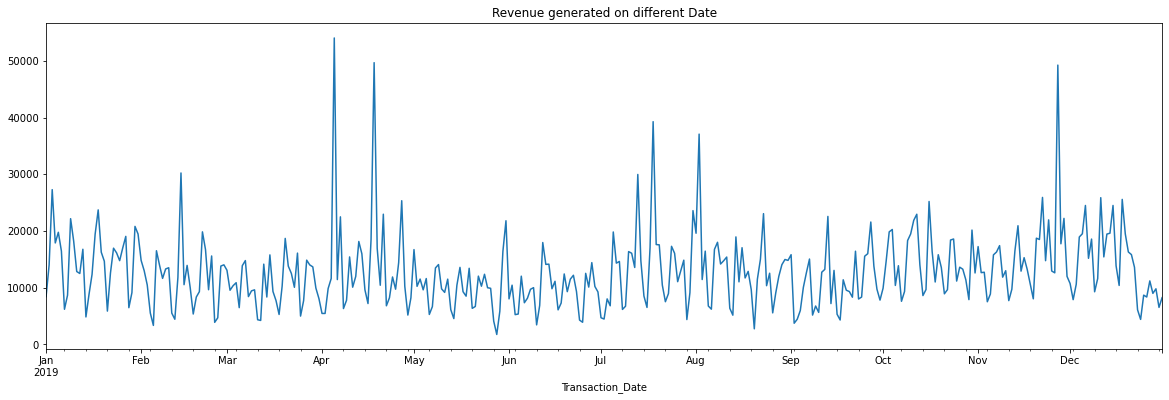

In [84]:
df.groupby('Transaction_Date')['Invoice_Value'].sum().plot(figsize=(20,6))
plt.title('Revenue generated on different Date')

Text(0.5, 1.0, 'Sales variations of different Product Categories with Date')

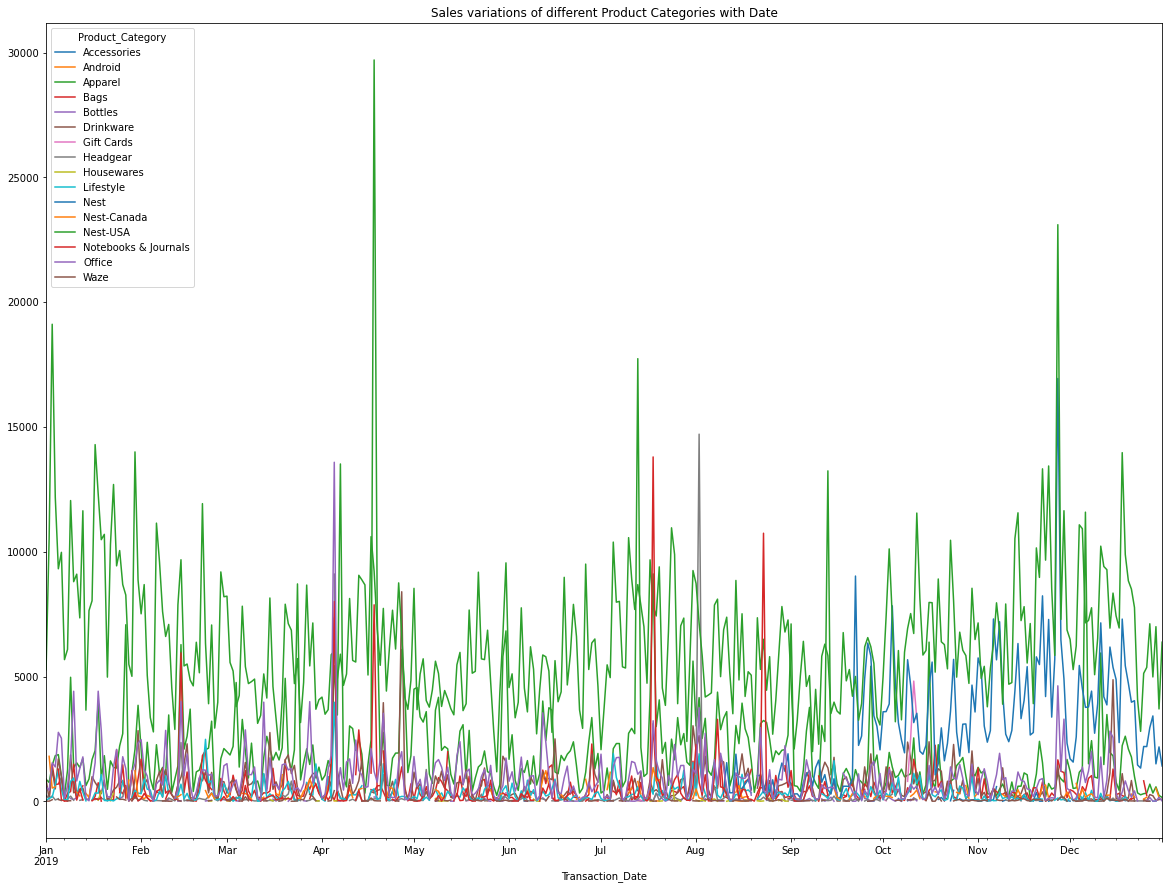

In [85]:
pd.crosstab(df['Transaction_Date'],
           df['Product_Category'],
           values = df['Invoice_Value'],
           aggfunc='sum').plot(figsize=(20,15))
plt.title('Sales variations of different Product Categories with Date')

Text(0.5, 1.0, 'Sales variations of different Location with Date')

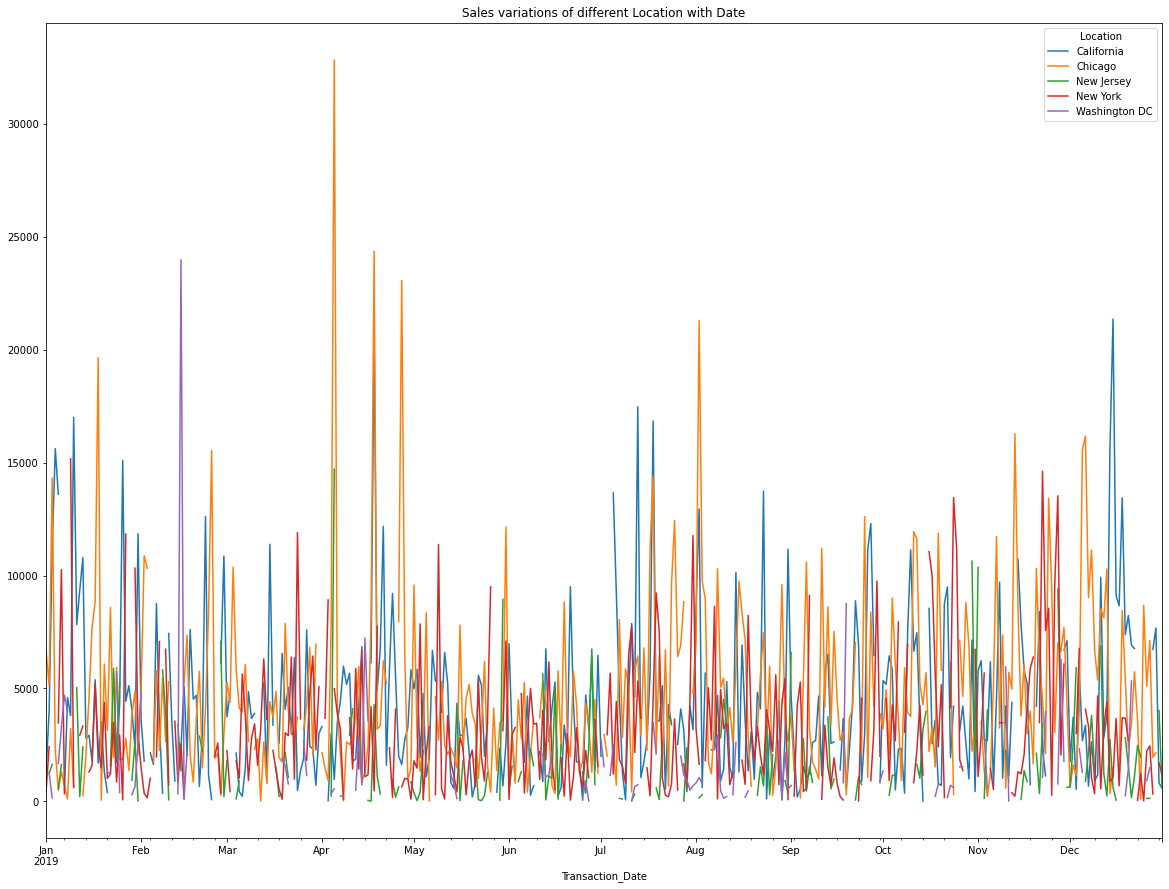

In [86]:
pd.crosstab(df['Transaction_Date'],
           df['Location'],
           values = df['Invoice_Value'],
           aggfunc='sum').plot(figsize=(20,15))
plt.title('Sales variations of different Location with Date')

Text(0.5, 1.0, 'Sales variations of different Month with Date')

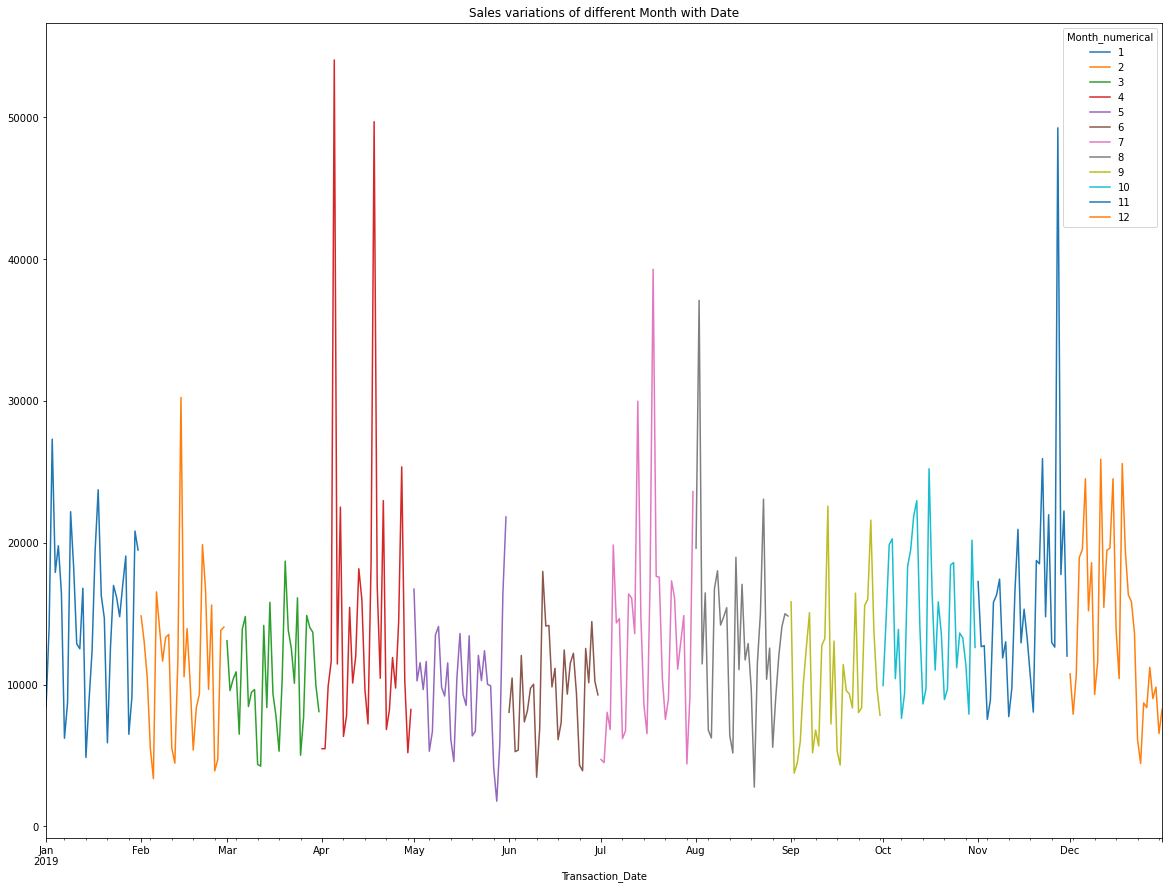

In [87]:
pd.crosstab(df['Transaction_Date'],
           df['Month_numerical'],
           values = df['Invoice_Value'],
           aggfunc='sum').plot(figsize=(20,15))
plt.title('Sales variations of different Month with Date')

#### Decomposition of the Data

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [89]:
df_ts = df.groupby('Transaction_Date')['Invoice_Value'].sum().to_frame()

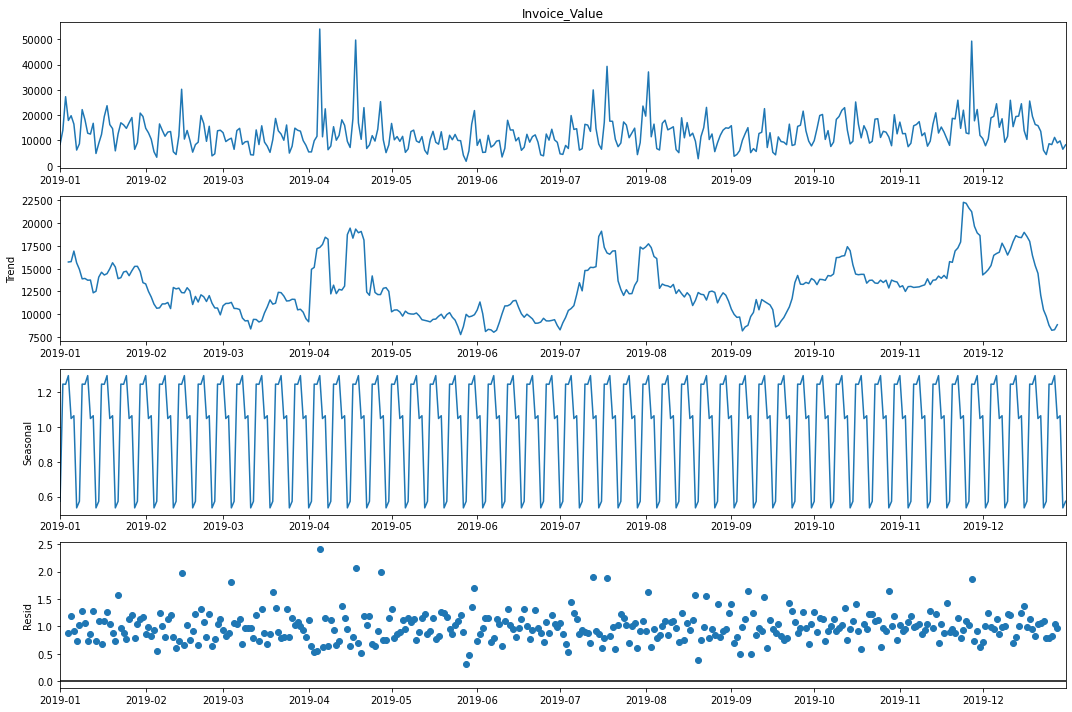

In [90]:
plt.rc("figure",figsize=(15,10))
decom = seasonal_decompose(df_ts["Invoice_Value"], model = "multiplicative")
decom.plot()
plt.show()

Text(0, 0.5, 'Number of orders')

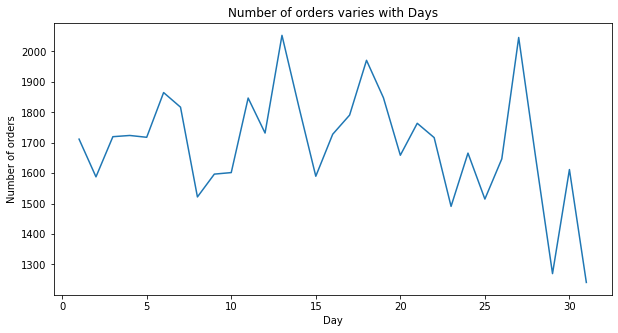

In [91]:
plt.figure(figsize=(10,5))
df.groupby('Day')['Transaction_ID'].count().plot()
plt.title('Number of orders varies with Days')
plt.ylabel('Number of orders')

Text(0, 0.5, 'Sales')

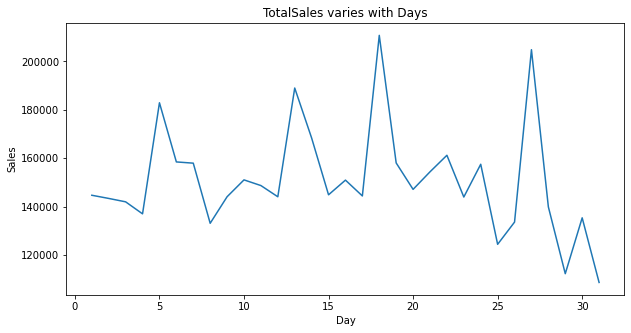

In [92]:
plt.figure(figsize=(10,5))
df.groupby('Day')['Invoice_Value'].sum().plot()
plt.title('TotalSales varies with Days')
plt.ylabel('Sales')

In [93]:
df['Market Spend'] = df['Offline_Spend']+ df['Online_Spend']
df['Discount'] = (df['Discount_pct']/100) * (df['Quantity']* df['Avg_Price'])
df['Tax'] = df['GST']*(df['Quantity']* df['Avg_Price'])

In [94]:
invoice_df = df.groupby('Month_numerical')['Invoice_Value','Delivery_Charges','Discount','Tax'].sum()

In [95]:
amt_df = pd.concat([invoice_df,market_spend_df],axis=1)

Text(0, 0.5, 'Months')

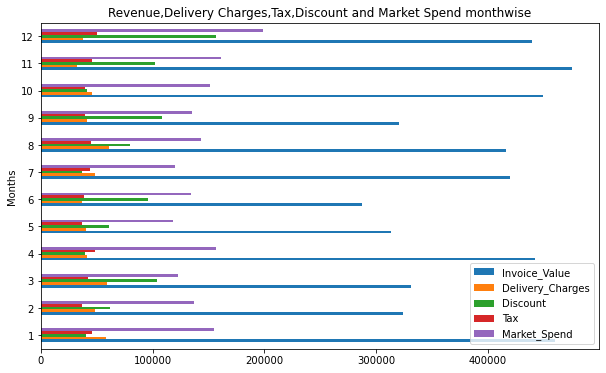

In [96]:
# Revenue, Market Spend,Tax,Delivery charges by months
amt_df.plot(kind='barh',figsize=(10,6))
plt.title('Revenue,Delivery Charges,Tax,Discount and Market Spend monthwise')
plt.ylabel('Months')

Text(0.5, 1.0, 'Ratio Discount to total Sales')

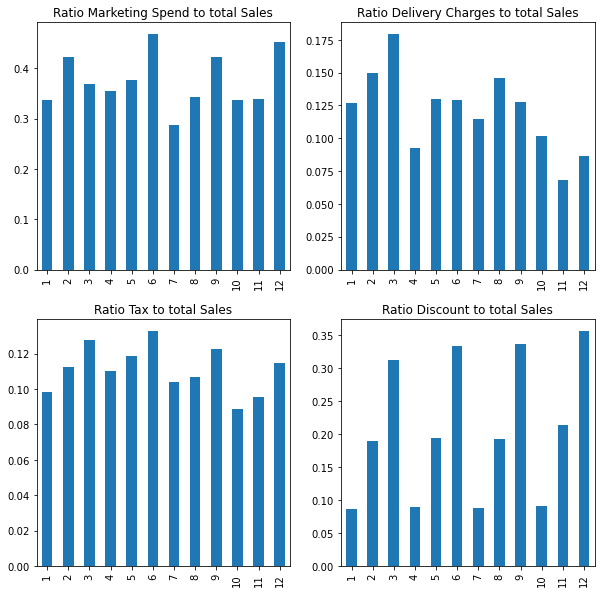

In [97]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
(amt_df['Market_Spend']/amt_df['Invoice_Value']).plot(kind='bar')
plt.title("Ratio Marketing Spend to total Sales")

plt.subplot(2,2,2)
(amt_df['Delivery_Charges']/amt_df['Invoice_Value']).plot(kind='bar')
plt.title("Ratio Delivery Charges to total Sales")

plt.subplot(2,2,3)
(amt_df['Tax']/amt_df['Invoice_Value']).plot(kind='bar')
plt.title("Ratio Tax to total Sales")

plt.subplot(2,2,4)
(amt_df['Discount']/amt_df['Invoice_Value']).plot(kind='bar')
plt.title("Ratio Discount to total Sales")

How marketing spend is impacting on revenue?

Text(0.5, 1.0, 'Variation of Total Revenue with Market Spend')

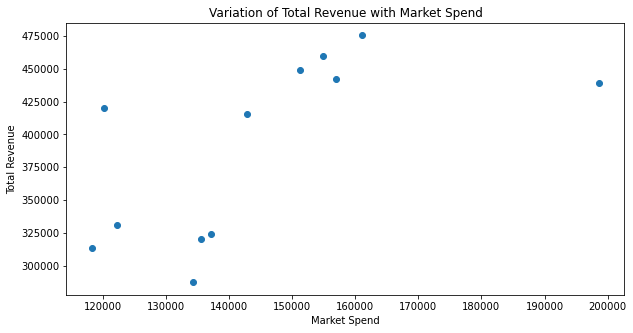

In [98]:
plt.figure(figsize=(10,5))
plt.scatter(x=amt_df['Market_Spend'],y= amt_df['Invoice_Value'])
plt.xlabel('Market Spend')
plt.ylabel('Total Revenue')
plt.title('Variation of Total Revenue with Market Spend')

- Which product was appeared in the transactions?

Text(0.5, 1.0, 'Top 10 most ordered Product Category')

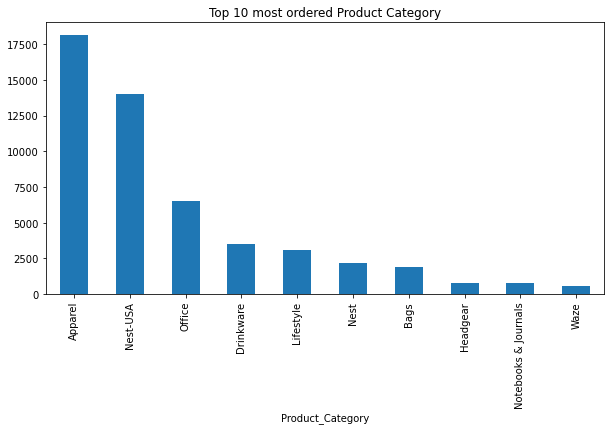

In [99]:
plt.figure(figsize=(10,5))
df.groupby("Product_Category")['Transaction_ID'].count().nlargest(10).plot(kind='bar')
plt.title("Top 10 most ordered Product Category")

- Which product was purchased mostly based on the quantity?

Text(0.5, 1.0, 'Top 10 product Category on basis of quantity')

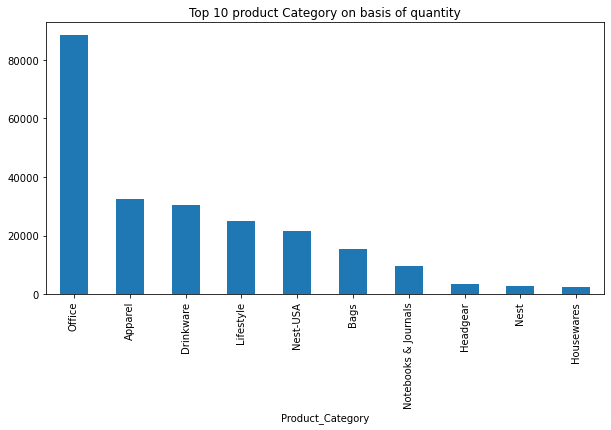

In [100]:
plt.figure(figsize=(10,5))
df.groupby("Product_Category")['Quantity'].sum().nlargest(10).plot(kind='bar')
plt.title("Top 10 product Category on basis of quantity")

###  Performing Customer Segmentation


In [101]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Market_Spend,Month_y,GST,Invoice_Value,Month_numerical,Day,Week,Market Spend,Discount,Tax
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,6924.5,1,0.1,158.6729,1,1,1,6924.5,15.371,15.371
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,6924.5,1,0.1,158.6729,1,1,1,6924.5,15.371,15.371
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,...,6924.5,1,0.1,249.5846,1,1,1,6924.5,24.554,24.554
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,...,6924.5,1,0.1,87.1850,1,1,1,6924.5,8.150,8.150
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,...,6924.5,1,0.1,158.6729,1,1,1,6924.5,15.371,15.371


#### Heuristic (Value based, RFM)

In [102]:
import datetime as dt

In [103]:
LatestDate = dt.datetime(2019,12,31)

In [104]:
rfm_model = df.groupby('CustomerID').agg({'Transaction_Date':lambda x : (LatestDate-x.max()).days,
                             'Transaction_ID': lambda x :x.count(),
                             'Invoice_Value': lambda x : x.sum()})

In [105]:
rfm_model.rename(columns={'Transaction_Date':'Recency',
                         'Transaction_ID':'Frequency',
                         'Invoice_Value':'Monetary'},inplace=True)

In [106]:
rfm_model.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,107,2,174.98174
12347,59,59,12059.17780
12348,73,23,1501.92620
12350,17,17,1183.71394
12356,107,36,1753.45086


In [107]:
rfm_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 12346 to 18283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1468 non-null   int64  
 1   Frequency  1468 non-null   int64  
 2   Monetary   1468 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 45.9 KB


Splitting Customer into 4 segments of Premium,Gold,Silver and standard

In [108]:
quantiles = rfm_model.quantile(q=[.25,.5,.75])
quantiles = quantiles.to_dict()

In [109]:
quantiles

{'Recency': {0.25: 55.0, 0.5: 131.0, 0.75: 220.0},
 'Frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 45.0},
 'Monetary': {0.25: 664.3640449999999, 0.5: 1770.5452, 0.75: 3911.871905}}

In [110]:
# Functions to create R,F,M Segments
def Rscoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    
def FnMscoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [111]:
# Calculating R,F,M scores
rfm_model['R'] = rfm_model['Recency'].apply(Rscoring,args=('Recency',quantiles,))
rfm_model['F'] = rfm_model['Frequency'].apply(FnMscoring,args=('Frequency',quantiles,))
rfm_model['M'] = rfm_model['Monetary'].apply(FnMscoring,args=('Monetary',quantiles,))

In [112]:
# Calulating Combined scores of Customer on basis of his/her Recency,Frequency and monetary
rfm_model['RFMScore'] = rfm_model[['R','F','M']].sum(axis=1)
rfm_model.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore
CustomerID,,,,,,,
12346,107,2,174.98174,3,1,1,5
12347,59,59,12059.17780,3,4,4,11
12348,73,23,1501.92620,3,3,2,8
12350,17,17,1183.71394,4,2,2,8
12356,107,36,1753.45086,3,3,2,8


In [113]:
# Customer segmentation as Premium ,Gold,silver and Standard
def cust_seg(x):
    if x<=3:
        return 'Standard'
    elif x<8:
        return 'Silver'
    elif x<12:
        return 'Gold'
    else:
        return 'Premium'

In [114]:
rfm_model['Customer_Segment'] = rfm_model['RFMScore'].apply(cust_seg)

In [115]:
rfm_model.head()

,Recency,Frequency,Monetary,R,F,M,RFMScore,Customer_Segment
CustomerID,,,,,,,,
12346,107,2,174.98174,3,1,1,5,Silver
12347,59,59,12059.17780,3,4,4,11,Gold
12348,73,23,1501.92620,3,3,2,8,Gold
12350,17,17,1183.71394,4,2,2,8,Gold
12356,107,36,1753.45086,3,3,2,8,Gold


Text(0.5, 1.0, 'Customer Segmentation on basis of their recency,frequency and monetary')

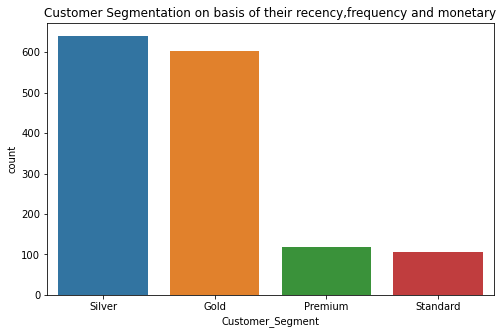

In [116]:
plt.figure(figsize=(8,5))
sns.countplot(rfm_model['Customer_Segment'])
plt.title("Customer Segmentation on basis of their recency,frequency and monetary")

#### Scientific (Using K-Means) 

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [118]:
X = rfm_model[['Recency','Frequency','Monetary']]

In [119]:
# Scaling of the Dataset before applyig KMeans Clustering
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

In [120]:
X = pd.DataFrame(X,columns=['Recency','Frequency','Monetary'])

Getting silhouette score for different clusters in KMeans Clustering to find optimal number of cluster

In [121]:
cluster_list = [2,3,4,5,6,7]
for n_clusters in cluster_list:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X,preds)
    
    print(f'For cluster :{n_clusters}, the silhoutte score is {score}')

For cluster :2, the silhoutte score is 0.569884334553949
For cluster :3, the silhoutte score is 0.3987974463005206
For cluster :4, the silhoutte score is 0.451504201820747
For cluster :5, the silhoutte score is 0.4290877441444008
For cluster :6, the silhoutte score is 0.39405063516595273
For cluster :7, the silhoutte score is 0.40251135715129344


Applying Elbow Method for getting idea of optimal number of clusters for customer Segmentations

Text(0, 0.5, 'Inertia')

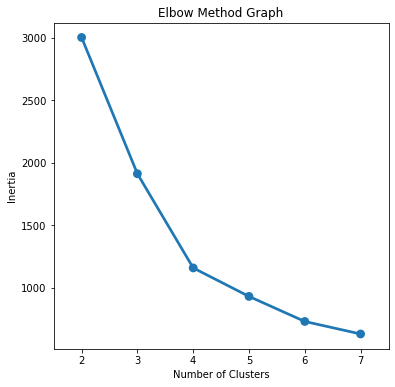

In [122]:
dist = {}
for k in range(2,8):
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    kmeans = kmeans.fit(X)
    dist[k] = kmeans.inertia_
    
plt.figure(figsize=(6,6))
sns.pointplot(x=list(dist.keys()),y=list(dist.values()))
plt.title('Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

On basis of Silhoutte score and Elbow Method  Graph we can divide customers into 4 Segments

In [123]:
# Dividing Customers into 4 Segments
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=1000)
kmeans = kmeans.fit_predict(X)

In [124]:
cluster = pd.Series(kmeans)
rfm_model['Cluster'] = cluster.values

Text(0.5, 0, 'Clusters Labels')

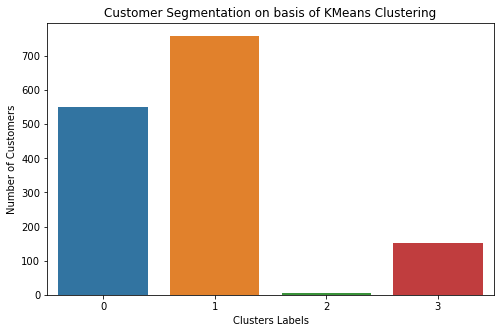

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(rfm_model['Cluster'])
plt.title("Customer Segmentation on basis of KMeans Clustering")
plt.ylabel('Number of Customers')
plt.xlabel("Clusters Labels")

### Predicting Customer Lifetime Value

In [126]:
# Makinng dataframe containing features important for making customer lifetime value classification model
cust_df = df.groupby(['CustomerID','Gender','Location'])['Quantity','Avg_Price','Delivery_Charges','Discount','Market_Spend','Tax','Invoice_Value'].sum()

In [127]:
cust_df.reset_index(['Gender','Location'],inplace=True)

In [128]:
# First define dependent variable with categories low value, medium value, high value
# using customer revenue.
def invoice_cat(x):
    if x<=665:
        return 'Low value'
    elif x<=3900:
        return 'Medium value'
    else:
        return 'High value'

In [129]:
cust_df['Invoice_Category'] = cust_df['Invoice_Value'].apply(invoice_cat)

In [130]:
cust_df.head()


,Gender,Location,Quantity,Avg_Price,Delivery_Charges,Discount,Market_Spend,Tax,Invoice_Value,Invoice_Category
CustomerID,,,,,,,,,,
12346,F,New York,3,25.49,150.00,9.297,11093.34,4.6982,174.98174,Low value
12347,M,New York,340,3734.97,658.64,3881.871,243355.54,2065.6690,12059.17780,High value
12348,M,California,209,336.52,197.15,299.618,121977.33,203.6008,1501.92620,Medium value
12350,M,California,21,1312.40,127.88,408.021,126383.27,148.2642,1183.71394,Medium value
12356,F,Chicago,56,1244.83,637.49,432.741,199680.12,151.7598,1753.45086,Medium value


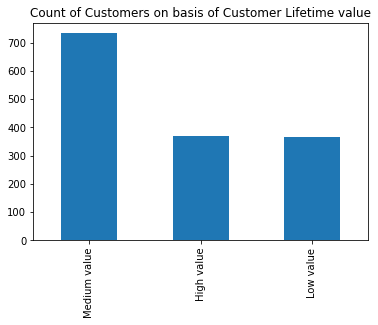

In [131]:
plt.figure(figsize=(6,4))
cust_df['Invoice_Category'].value_counts().plot(kind='bar')
plt.title('Count of Customers on basis of Customer Lifetime value')
plt.show()

In [132]:
# Sepearting target variable from dataset
X = cust_df.drop(['Invoice_Category','Invoice_Value'],axis=1)
y = cust_df['Invoice_Category']

In [133]:
# Label Encoding 
X = pd.get_dummies(data=X,columns=['Gender','Location'],drop_first=True)

In [134]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,index = cust_df.index,columns=cols)

In [136]:
# Spliting the model into train and test datasets
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [138]:
# Building a classification model using decision tree
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [140]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [141]:
# Evaluating the performance of the model 
from sklearn.metrics import confusion_matrix,classification_report

Classification Report of training dataset

In [142]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

  High value       1.00      1.00      1.00       241
   Low value       1.00      1.00      1.00       254
Medium value       1.00      1.00      1.00       488

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



Classification Report of testing Dataset

In [143]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

  High value       0.91      0.90      0.90       127
   Low value       0.95      0.97      0.96       113
Medium value       0.93      0.93      0.93       245

    accuracy                           0.93       485
   macro avg       0.93      0.93      0.93       485
weighted avg       0.93      0.93      0.93       485



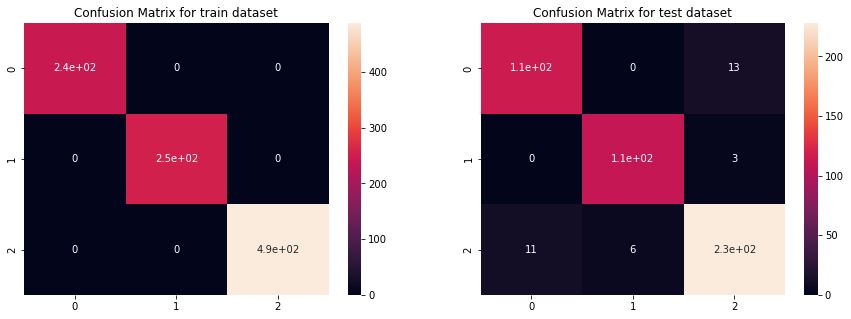

In [144]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True)
plt.title("Confusion Matrix for train dataset")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)
plt.title("Confusion Matrix for test dataset")

plt.show()

### Cross-Selling 

In [145]:
# Average number of items per shopping
item_qty = df[['CustomerID','Transaction_Date','Product_Category']].groupby(['CustomerID','Transaction_Date']).count()
item_qty.head()

Product_Category
CustomerID Transaction_Date                  
12346      2019-09-15                       2
12347      2019-03-24                      30
           2019-11-01                       4
           2019-11-02                      25
12348      2019-06-22                      17

In [146]:
print(f'The average number of items per shopping is around: {round(item_qty.Product_Category.mean(),2)}')

The average number of items per shopping is around: 16.38


Text(0.5, 1.0, 'Histogram of item quantities per shopping')

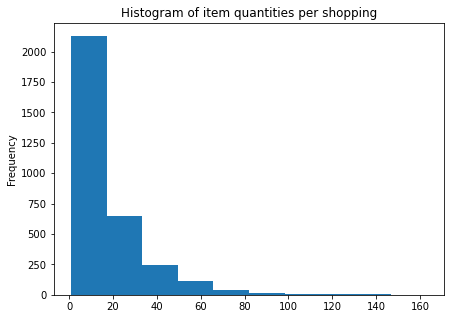

In [147]:
item_qty['Product_Category'].plot(kind='hist',figsize=(7,5))
plt.title('Histogram of item quantities per shopping')

In [148]:
# Dataframe containing items list per shoppings
items = df.groupby(['CustomerID','Transaction_Date']).agg({'Product_Category': lambda x:x.ravel().tolist()})
items.head()

Product_Category
CustomerID Transaction_Date                                                   
12346      2019-09-15                                        [Office, Apparel]
12347      2019-03-24        [Nest-USA, Nest-USA, Nest-USA, Nest-USA, Nest-...
           2019-11-01                    [Office, Apparel, Apparel, Lifestyle]
           2019-11-02        [Nest-USA, Nest-USA, Nest-USA, Nest-USA, Nest-...
12348      2019-06-22        [Nest-USA, Office, Office, Office, Office, Off...

For items to be bundeled together, we need to find the pairs of product category which are bought together most frequently

In [149]:
import itertools

In [150]:
combinations_list = []
for row in items.Product_Category:
    combinations = list(itertools.combinations(row,2))
    combinations_list.append(combinations)

In [151]:
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

Text(0.5, 1.0, 'Top 10 Product Category pairs that are selling together')

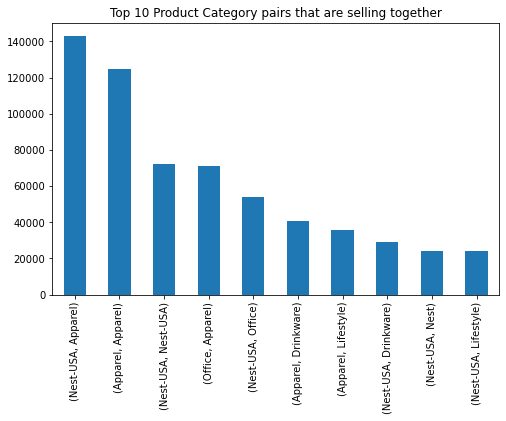

In [152]:
combination_counts.value_counts().nlargest(10).plot(kind='bar',figsize=(8,5))
plt.title("Top 10 Product Category pairs that are selling together")

### Predicting Next Purchase Day

In [153]:
purchase_df = existing_cust_df.groupby(['CustomerID','Gender','Location']).agg({'Transaction_ID':lambda x: x.count(),
                                            'Quantity': lambda x: x.sum(),
                                            'Avg_Price': lambda x: x.sum(),
                                            'Delivery_Charges': lambda x: x.sum(),
                                            'Invoice_Value': lambda x: x.sum(),
                                            'Transaction_Date': lambda x: (LatestDate-x.max()).days                                     
                                           })

In [154]:
purchase_df.reset_index(['Gender','Location'],inplace=True)

In [155]:
purchase_df.rename(columns={'Transaction_ID':'Orders_Count',
                           'Product_Category':'Products_Count',
                           'Transaction_Date':'Days_since_Purchase'},inplace=True)

In [156]:
# Creating dependent variable
def purchase_interval(x):
    if x<=30:
        return 0
    elif x<=60:
        return 1
    elif x<=90:
        return 2
    else:
        return 3

In [157]:
purchase_df['Purchase_interval'] = purchase_df['Days_since_Purchase'].apply(purchase_interval)

In [158]:
purchase_df.head()

,Gender,Location,Orders_Count,Quantity,Avg_Price,Delivery_Charges,Invoice_Value,Days_since_Purchase,Purchase_interval
CustomerID,,,,,,,,,
12346,F,New York,2,3,25.49,150.00,174.98174,107,3
12347,M,New York,59,340,3734.97,658.64,12059.17780,59,1
12348,M,California,23,209,336.52,197.15,1501.92620,73,2
12350,M,California,17,21,1312.40,127.88,1183.71394,17,0
12356,F,Chicago,36,56,1244.83,637.49,1753.45086,107,3


<AxesSubplot:>

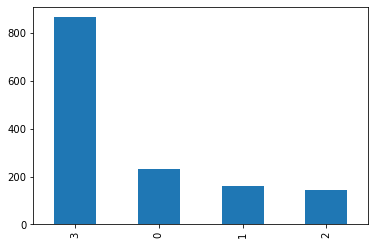

In [159]:
purchase_df['Purchase_interval'].value_counts().plot(kind='bar',figsize=(6,4))

In [160]:
# Seperating dependent and independent variables
X = purchase_df.drop(['Days_since_Purchase','Purchase_interval'],axis=1)
y = purchase_df['Purchase_interval']

In [161]:
# Label encoding
X = pd.get_dummies(data=X,columns=['Gender','Location'],drop_first=True)

In [162]:
cols=X.columns
X = scaler.fit_transform(X)

X = pd.DataFrame(X,index=purchase_df.index,columns=cols)

In [163]:
# Spliting Dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [164]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [165]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [166]:
from xgboost import XGBClassifier

In [167]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
xbc = XGBClassifier()

In [168]:
from sklearn.metrics import accuracy_score,f1_score

In [169]:
# defining a function which will give table of accuracies foer all the model
def classifier(X_tr,X_te,y_tr,y_te):
    model_list = [dt,rf,nb,xbc]
    model_name = []
    acc_tr,acc_te = [],[]
    f1_tr,f1_te = [],[]
    time_taken = []
    
    for model in model_list:
        start_time = time.time()
        
        model.fit(X_tr,y_tr)
        
        y_tr_pred = model.predict(X_tr)
        y_te_pred = model.predict(X_te)
        
        y_tr_acc = accuracy_score(y_tr,y_tr_pred)
        y_te_acc = accuracy_score(y_te,y_te_pred)
        
        y_tr_f1 = f1_score(y_tr,y_tr_pred,average='micro')
        y_te_f1 = f1_score(y_te,y_te_pred,average='micro')
        
        time1 = time.time()-start_time
        
        model_name.append(model.__class__.__name__)
        acc_tr.append(y_tr_acc)
        acc_te.append(y_te_acc)
        f1_tr.append(y_tr_f1)
        f1_te.append(y_te_f1)
        time_taken.append(time1)
        
    model_df = pd.DataFrame({'model_name':model_name,
                           'accuracy_train':acc_tr,
                           'accuracy_test':acc_te,
                           'f1score_train':f1_tr,
                           'f1score_test':f1_te,
                           'time_taken':time_taken})
    return model_df

In [170]:
%%time
classifier(X_train,X_test,y_train,y_test)

CPU times: total: 2.31 s
Wall time: 589 ms


,model_name,accuracy_train,accuracy_test,f1score_train,f1score_test,time_taken
0,DecisionTreeClassifier,1.000000,0.492441,1.000000,0.492441,0.018509
1,RandomForestClassifier,1.000000,0.613391,1.000000,0.613391,0.269045
2,GaussianNB,0.586794,0.598272,0.586794,0.598272,0.007004
3,XGBClassifier,1.000000,0.591793,1.000000,0.591793,0.294541


Random fotest Classifier is showing better results on test data as compare  to  other models

In [171]:
rf = RandomForestClassifier(random_state=42)

In [172]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [173]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [174]:
from sklearn.metrics import confusion_matrix as cm

In [175]:
cf_matrix_tr = cm(y_train,y_pred_train)
cf_matrix_te = cm(y_test,y_pred_test)

In [176]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       574

    accuracy                           1.00       939
   macro avg       1.00      1.00      1.00       939
weighted avg       1.00      1.00      1.00       939



In [177]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.31      0.19      0.23        81
           1       0.22      0.08      0.12        50
           2       0.25      0.07      0.12        40
           3       0.68      0.89      0.77       292

    accuracy                           0.61       463
   macro avg       0.36      0.31      0.31       463
weighted avg       0.53      0.61      0.55       463



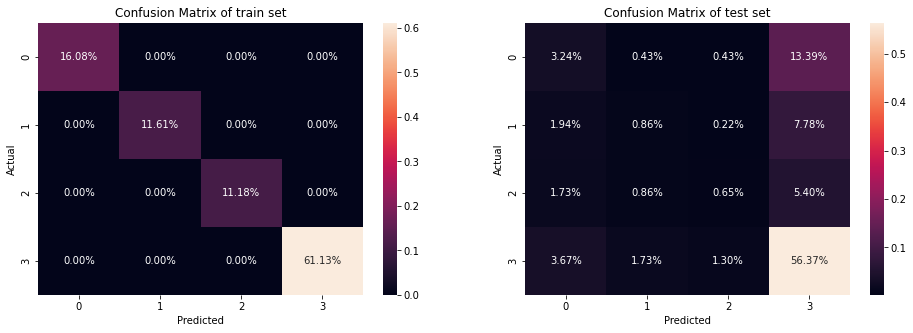

In [178]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.heatmap(cf_matrix_tr/np.sum(cf_matrix_tr),annot=True,fmt='.2%').set(title="Confusion Matrix of train set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(cf_matrix_te/np.sum(cf_matrix_te),annot=True,fmt='.2%').set(title = 'Confusion Matrix of test set')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Perform cohort analysis

In [179]:
transaction_df = df.groupby('CustomerID')['Month_numerical'].agg(['max','min'])

In [180]:
transaction_df.rename(columns={'max':'RecentMonth',
                              'min':'CohortMonth'},inplace=True)

In [181]:
transaction_df['CohortIndex'] = transaction_df['RecentMonth'] - transaction_df['CohortMonth'] + 1

In [182]:
transaction_df.head()

,RecentMonth,CohortMonth,CohortIndex
CustomerID,,,
12346,9,9,1
12347,11,3,9
12348,10,6,5
12350,12,12,1
12356,9,9,1


In [183]:
transaction_df.reset_index(inplace=True)

In [184]:
# Counting daily active user from each cohort
grouping = transaction_df.groupby(['CohortMonth','CohortIndex'])

# counting number of unique customers ids falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

In [185]:
cohort_data = cohort_data.reset_index()

In [186]:
# assigning columns names to the dataframe created above
cohort_count = cohort_data.pivot(index='CohortMonth',
                 columns='CohortIndex',
                 values='CustomerID')

In [187]:
cohort_count.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
1,96.0,2.0,2.0,7.0,5.0,13.0,8.0,16.0,7.0,11.0,14.0,34.0
2,29.0,1.0,3.0,5.0,2.0,7.0,6.0,10.0,10.0,7.0,16.0,NaN
3,71.0,6.0,9.0,8.0,13.0,15.0,13.0,11.0,12.0,19.0,NaN,NaN
4,83.0,5.0,11.0,12.0,9.0,11.0,5.0,15.0,12.0,NaN,NaN,NaN
5,59.0,4.0,4.0,8.0,6.0,10.0,13.0,8.0,NaN,NaN,NaN,NaN


Now calculating retention rate of each customers

In [188]:
cohort_sizes = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_sizes,axis=0)

retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
1,100.0,2.1,2.1,7.3,5.2,13.5,8.3,16.7,7.3,11.5,14.6,35.4
2,100.0,3.4,10.3,17.2,6.9,24.1,20.7,34.5,34.5,24.1,55.2,NaN
3,100.0,8.5,12.7,11.3,18.3,21.1,18.3,15.5,16.9,26.8,NaN,NaN
4,100.0,6.0,13.3,14.5,10.8,13.3,6.0,18.1,14.5,NaN,NaN,NaN
5,100.0,6.8,6.8,13.6,10.2,16.9,22.0,13.6,NaN,NaN,NaN,NaN
6,100.0,8.8,11.2,10.0,12.5,15.0,13.8,NaN,NaN,NaN,NaN,NaN
7,100.0,12.9,3.2,4.8,16.1,12.9,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,12.6,12.6,8.4,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,7.2,2.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing the retention rate

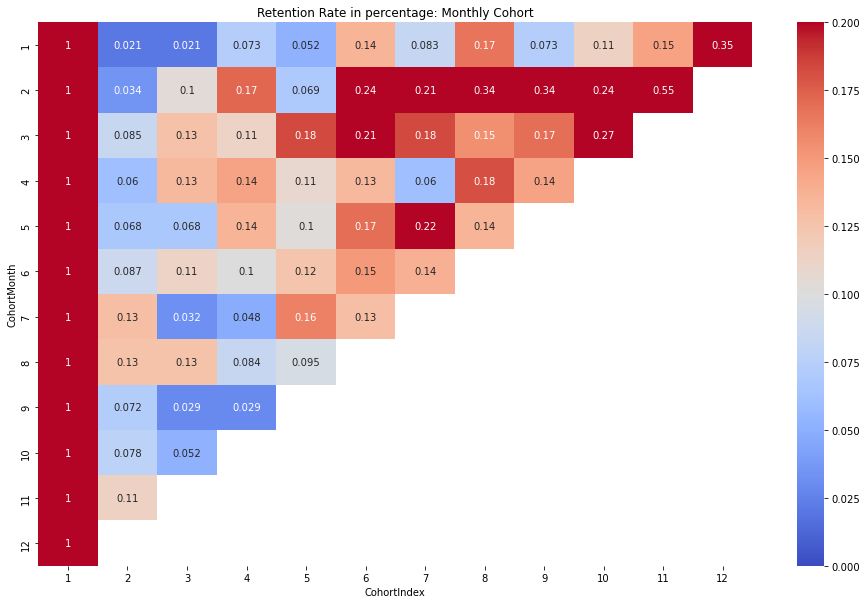

In [191]:
plt.figure(figsize=(16,10))
plt.title('Retention Rate in percentage: Monthly Cohort')
sns.heatmap(retention,annot=True,vmin=0.0,vmax=0.2,cmap='coolwarm')
plt.ylabel('CohortMonth')
plt.xlabel('CohortIndex')
plt.show()